In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv("summer.csv")

In [15]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [16]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# 1. In how many cities Summer Olympics is held so far?


In [17]:
print("The number of cites in which summer olymoics were held are =",len(df['City'].unique()))

The number of cites in which summer olymoics were held are = 22


# 2. Which sport is having most number of Gold Medals so far?

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Sport'>

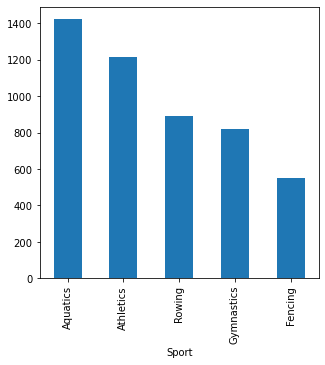

In [18]:
data = df[df['Medal']=='Gold']
data = data.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()
print(data)
data.plot.bar(figsize = (5,5))

# 3. Which sport is having most number of medals so far?

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Sport'>

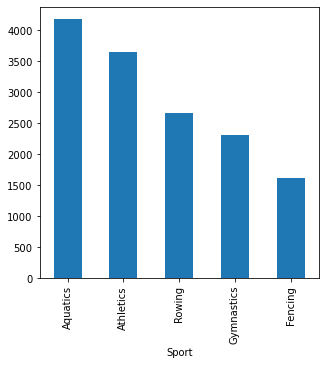

In [19]:
data = []
data = df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()
print(data)
data.plot.bar(figsize = (5,5))

# 4. Which player has won most number of medals?

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Athlete'>

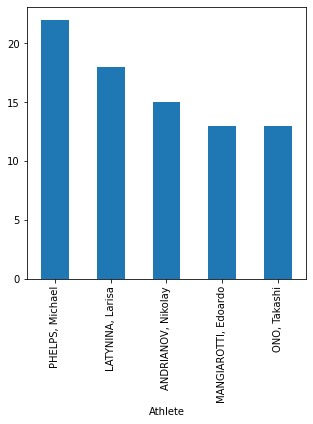

In [20]:
Player = df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head()
print(Player)
Player.plot.bar(figsize = (5,5))

# 5. Which player has won most number Gold Medals of medals?

Athlete
PHELPS, Michael     18
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Athlete'>

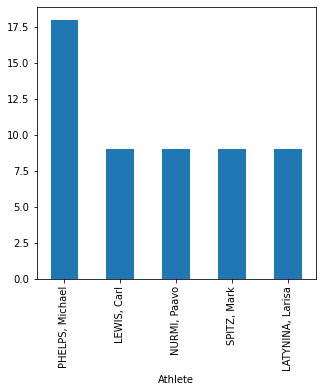

In [21]:
player = []
player = df[df['Medal'] == 'Gold']
player = player.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head()
print(player)
player.plot.bar(figsize=(5,5))

# 6. In which year India won first Gold Medal in Summer Olympics?

In [22]:
Medal = df[df['Medal'] == 'Gold']
year = Medal.sort_values(['Year'],ascending=True)

Gold = year[year['Country']== 'IND'].iloc[0]

print("The year in which India won the first Gold Medal in Summer Olympics is ",Gold['Year'],"\n")
print(Gold)

The year in which India won the first Gold Medal in Summer Olympics is  1928 

Year                 1928
City            Amsterdam
Sport              Hockey
Discipline         Hockey
Athlete       CHAND, Dyan
Country               IND
Gender                Men
Event              Hockey
Medal                Gold
Name: 5513, dtype: object


# 7. Which event is most popular in terms on number of players?

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64


<AxesSubplot:xlabel='Event'>

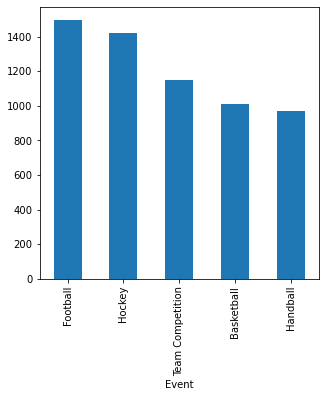

In [23]:
Event = df.groupby('Event').count()['Athlete'].sort_values(ascending = False ).head()
print(Event)
Event.plot.bar(figsize=(5,5))

# 8. Which sport is having most female Gold Medalists?

         Sport  female gold medalists
4     Aquatics                    589
7    Athletics                    389
8   Gymnastics                    268
14      Rowing                    217
11  Volleyball                    166


<AxesSubplot:xlabel='Sport'>

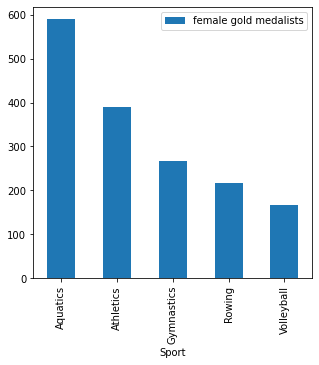

In [24]:
womens_gold = df[(df['Gender'] == 'Women') & (df['Medal'] == 'Gold')]

data = []
for sport in womens_gold['Sport'].unique():
        data.append([sport,len(womens_gold[womens_gold['Sport'] == sport])])
data = pd.DataFrame(data,columns=['Sport','female gold medalists']).sort_values(by ='female gold medalists',ascending = False ).head()
print(data)
data.plot.bar(x='Sport',figsize=(5,5))